In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fmin_bfgs
plt.rcParams['axes.formatter.limits'] = [-3,3]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 1 Logistic Regression

## 1.1 Visualizing the Data

In [2]:
data = np.loadtxt('ex2_octave/ex2data1.txt', delimiter=',')
x, y = data[:,:2], data[:,2]

In [3]:
def plotData(X, y):
    
    # get indices of 1 and 0 y values
    pos = y == 1
    neg = y == 0
    
    # plot positive (i.e., accepted) points
    plt.plot(X[pos,0], X[pos,1], '+', color='k', ms=7,
             mew=2, label=r'Admitted')
    
    # plot negative (i.e., not accepted) points
    plt.plot(X[neg,0], X[neg,1], 'o', color='y', ms=7,
            label=r'Not Admitted')
    
    # axes labels
    plt.xlabel(r'Exam 1 Score')
    plt.ylabel(r'Exam 2 Score')
    
    # add legend
    plt.legend(loc='best', fontsize=8, numpoints=1)

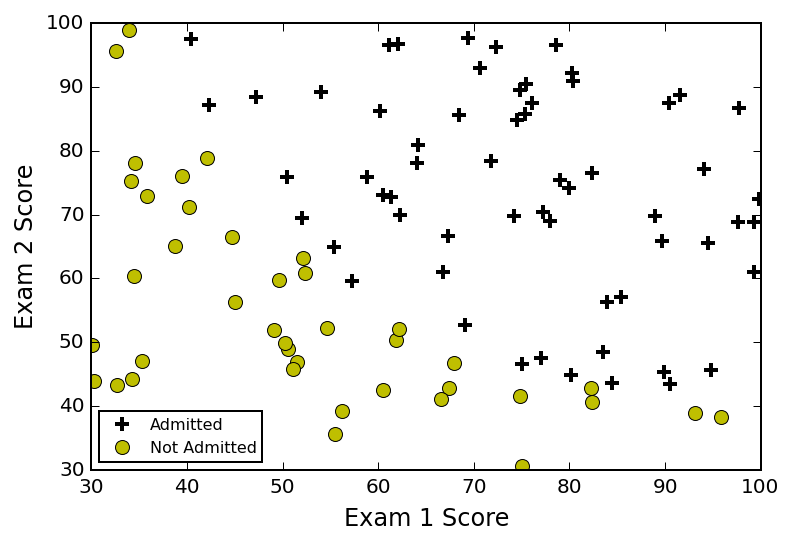

In [4]:
# plot the Data
plotData(x, y)

## 1.2 Implementation

### 1.2.1 Warmup Exercise: Sigmoid function

In [5]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

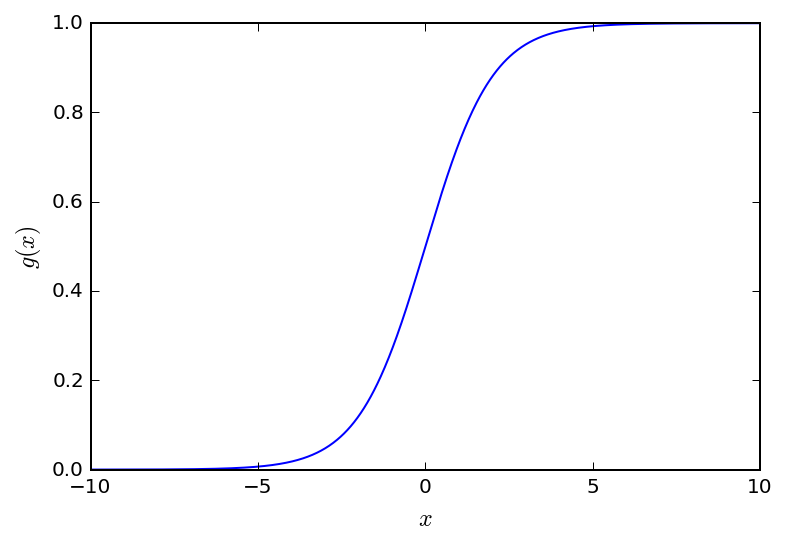

In [6]:
# test on a few values
xx = np.linspace(-10, 10, 1000)

# plot sigmoid function vs. x
plt.plot(xx, sigmoid(xx))
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')

### 1.2.2 Cost function and gradient

Here we will define auxiliary ```compute_cost``` and ```compute_grad``` functions to use in an overal ```costFunction```. We do this because we will need separate cost function and gradient functions when we use ```scipy.optimize``` in further exercises.

In [7]:
def compute_cost(theta, X, y):
    
    # number of training samples
    m = len(y)  
    
    # tolerance for sigmoid function.
    # i.e., 1-htheta cannot be less than 1e-15
    # this fixes loss of precision errors
    eps = 1e-15
    
    # compute the hypothesis
    htheta = sigmoid(np.dot(X, theta))
        
    # compute J in two terms
    term1 = np.dot(np.log(htheta), y)
    term2 = np.dot(np.log(1-htheta+eps), (1-y))
    
    # cost function
    J = - 1 / m * (term1 + term2)
    
    return J

def compute_grad(theta, X, y):
    
    # number of training samples
    m = len(y)
    
    # compute the hypothesis
    htheta = sigmoid(np.dot(X, theta))
    
    # gradient
    grad = np.dot(X.T, (htheta - y)) / m
            
    return grad
    
    
def costFunction(theta, X, y):
    
    # use auxiliary cost function
    J = compute_cost(theta, X, y)
    
    # use auxiliary gradient function
    grad = compute_grad(theta, X, y)
    
    return J, grad

In [8]:
# setup the data matrix appropriately
m, n = x.shape

# add intercept term to X
X = np.hstack((np.ones((m, 1)), x))

# initalize theta
initial_theta = np.zeros(n+1)

# compute and display initial cost and gradient
J, grad = costFunction(initial_theta, X, y)

print 'Cost at initial theta (zeros): {0}'.format(J)
print 'Gradient at inital theta (zeros):\n {0}'.format(grad)

Cost at initial theta (zeros): 0.69314718056
Gradient at inital theta (zeros):
 [ -0.1        -12.00921659 -11.26284221]


### 1.2.3 Learning parameters with ```scipy.optimize``` using BFGS

Here we are using the scipy BFGS implementation. We only need to give this
function the cost function, the initial parameters, and the gradient. This function
will return the values of theta that minimize the cost function.

In [9]:
# call scipy.optimize BFGS function
theta_new = fmin_bfgs(compute_cost, initial_theta, fprime=compute_grad,
                maxiter=400, args=(X,y), disp=False)

In [10]:
print 'Best fit theta: {0}'.format(theta_new)
print 'Cost function at best fit theta: {0}'.format(compute_cost(theta_new, X, y))

Best fit theta: [-25.16133569   0.20623174   0.20147161]
Cost function at best fit theta: 0.203497701589


In [11]:
def plotDecisionBoundary(theta, X, y):
    
    plotData(X[:,1:], y)
    
    # get min and max values
    xx = np.array([np.min(X[:,1]), np.max(X[:,1])])
    
    # get boundary of separation
    yy = (- theta[0] - theta[2] * xx) / theta[1]
    
    plt.plot(xx, yy, lw=1.5)   

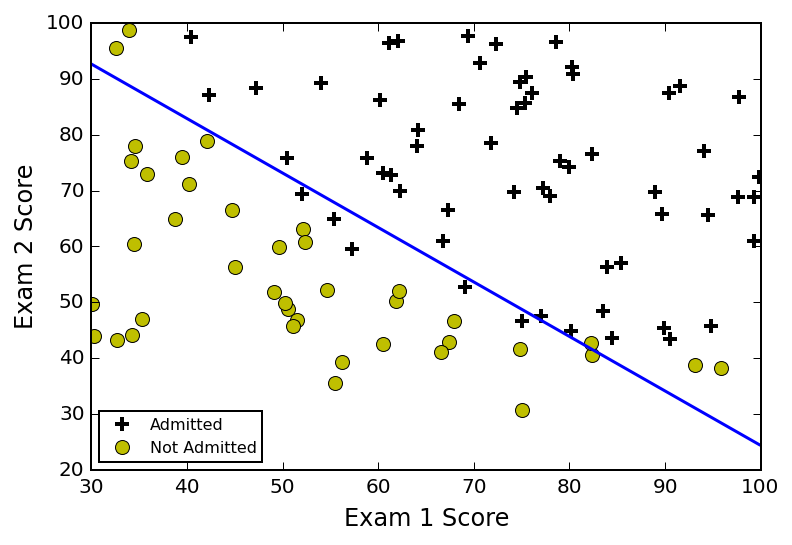

In [12]:
plotDecisionBoundary(theta_new, X, y)

### 1.2.4 Evaluating Logistic Regression

In [13]:
# exam1 score of 45 and exam2 score of 85
vals = np.array([45, 85])
vals = np.hstack((np.array([1]), vals))

prob = sigmoid(np.dot(theta_new, vals))

print 'Probablity of acceptance for exam 1 score: {0} and exam 2 score: {1} is {2} percent.'.format(
    vals[1], vals[2], prob*100)

Probablity of acceptance for exam 1 score: 45 and exam 2 score: 85 is 77.6290589028 percent.


In [14]:
def predict(theta, X):
    
    htheta = sigmoid(np.dot(X, theta))
    
    return np.array([1 if h > 0.5 else 0 for h in htheta])

In [15]:
# get prediction for training set
p = predict(theta_new, X)

# get training accuracy
print 'Training Accuracy: {0}'.format(np.mean(p==y)*100)

Training Accuracy: 89.0


# 2 Regularized logistic regression

## 2.1 Visualizing the data

In [16]:
def plotData2(X, y):
    
    # get indices of 1 and 0 y values
    pos = y == 1
    neg = y == 0
    
    # plot positive (i.e., accepted) points
    plt.plot(X[pos,0], X[pos,1], '+', color='k', ms=7,
             mew=2, label=r'Accepted')
    
    # plot negative (i.e., not accepted) points
    plt.plot(X[neg,0], X[neg,1], 'o', color='y', ms=7,
            label=r'Rejected')
    
    # axes labels
    plt.xlabel(r'Microchip test 1')
    plt.ylabel(r'Microchip test 2')
    
    # add legend
    plt.legend(loc='best', fontsize=8, numpoints=1)

In [17]:
# read in data set 2
data = np.loadtxt('ex2_octave/ex2data2.txt', delimiter=',')
x, y = data[:,:2], data[:,2]

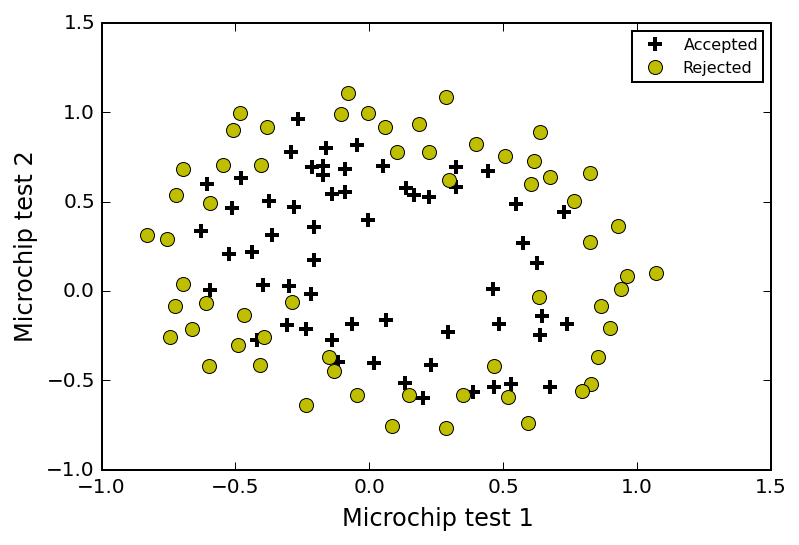

In [18]:
plotData2(x, y)

## 2.2 Feature Mapping

In [19]:
def mapFeature(X1, X2, degrees=6):
    
    m = len(np.atleast_1d(X1))
    X = np.ones((m, 1))
    for ii in range(1, degrees+1):
        for jj in range(0,ii+1):
            X = np.hstack((X, (X1**(ii-jj) * X2**jj).reshape(m,1)))
    
    return X

In [20]:
# get full array of features
X = mapFeature(x[:,0], x[:,1])

## 2.3 Cost function and gradient

In [21]:
def compute_cost_reg(theta, X, y, lam):
    
    # make an array of lambdas 
    lamarray = np.ones(len(theta)) * lam
    
    # zero out first element so se don't regularize constant term
    lamarray[0] = 0.0
    
    # number of training samples
    m = len(y)  
    
    # tolerance for sigmoid function.
    # i.e., 1-htheta cannot be less than 1e-15
    # this fixes loss of precision errors
    eps = 1e-15
    
    # compute the hypothesis
    htheta = sigmoid(np.dot(X, theta))
        
    # compute J in three terms
    term1 = np.dot(np.log(htheta), y)
    term2 = np.dot(np.log(1-htheta+eps), (1-y))
    term3 =  1 / 2  * np.sum(lamarray*theta**2)
    
    # cost function
    J = - 1 / m * (term1 + term2 - term3) 
    
    return J

def compute_grad_reg(theta, X, y, lam):
    
     # make an array of lambdas 
    lamarray = np.ones(len(theta)) * lam
    
    # zero out first element so se don't regularize constant term
    lamarray[0] = 0.0
    
    # number of training samples
    m = len(y)
    
    # compute the hypothesis
    htheta = sigmoid(np.dot(X, theta))
    
    # gradient
    grad = (np.dot(X.T, (htheta - y)) + lamarray * theta) / m
            
    return grad
    
    
def costFunctionReg(theta, X, y, lam):
    
    # use auxiliary cost function
    J = compute_cost_reg(theta, X, y, lam)
    
    # use auxiliary gradient function
    grad = compute_grad_reg(theta, X, y, lam)
    
    return J, grad

In [22]:
# initalize theta
initial_theta = np.zeros(X.shape[1])

# set regularization parameter to 1
lam = 1

# compute and display initial cost and gradient
J, grad = costFunctionReg(initial_theta, X, y, lam)

print 'Cost at initial theta (zeros): {0}'.format(J)
print 'Gradient at inital theta (zeros):\n {0}'.format(grad)

Cost at initial theta (zeros): 0.69314718056
Gradient at inital theta (zeros):
 [  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02   3.76648474e-02   1.83559872e-02   7.32393391e-03
   8.19244468e-03   2.34764889e-02   3.93486234e-02   2.23923907e-03
   1.28600503e-02   3.09593720e-03   3.93028171e-02   1.99707467e-02
   4.32983232e-03   3.38643902e-03   5.83822078e-03   4.47629067e-03
   3.10079849e-02   3.10312442e-02   1.09740238e-03   6.31570797e-03
   4.08503006e-04   7.26504316e-03   1.37646175e-03   3.87936363e-02]


### 2.3.1 Learning parameters with ```scipy.optimize``` using BFGS

In [23]:
# call scipy.optimize BFGS function
theta_new_reg = fmin_bfgs(compute_cost_reg, initial_theta, fprime=compute_grad_reg,
                          maxiter=500, args=(X, y, lam), disp=False)

In [24]:
def plotDecisionBoundary2(theta, X, y):

    # plot the data
    plotData2(X[:,1:3], y)

    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros((len(u), len(v)))
    for ii in range(len(u)):
        for jj in range(len(v)):
            z[ii,jj] = np.dot(mapFeature(u[ii], v[jj]), theta_new_reg)

    plt.contour(u, v, z.T, [0,0], labels='Decision Boundary', colors='b')
    


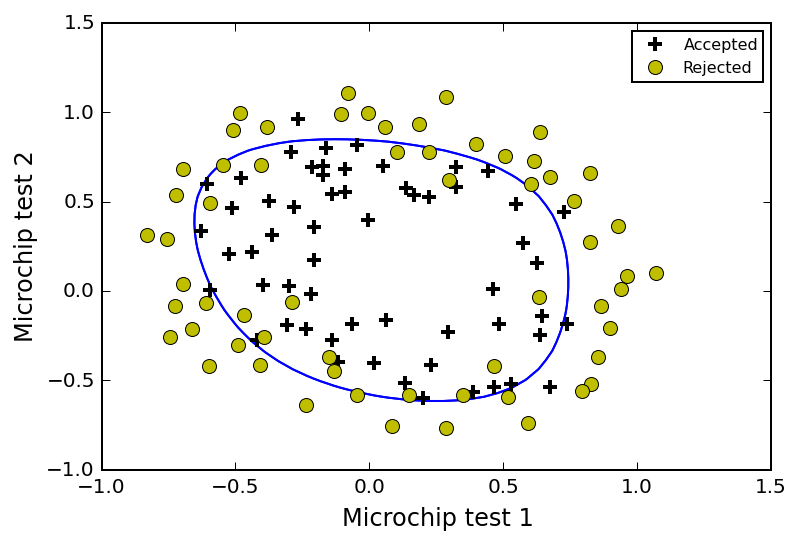

In [25]:
plotDecisionBoundary2(theta_new_reg, X, y)

## 2.5 Varying the Regularization parameter

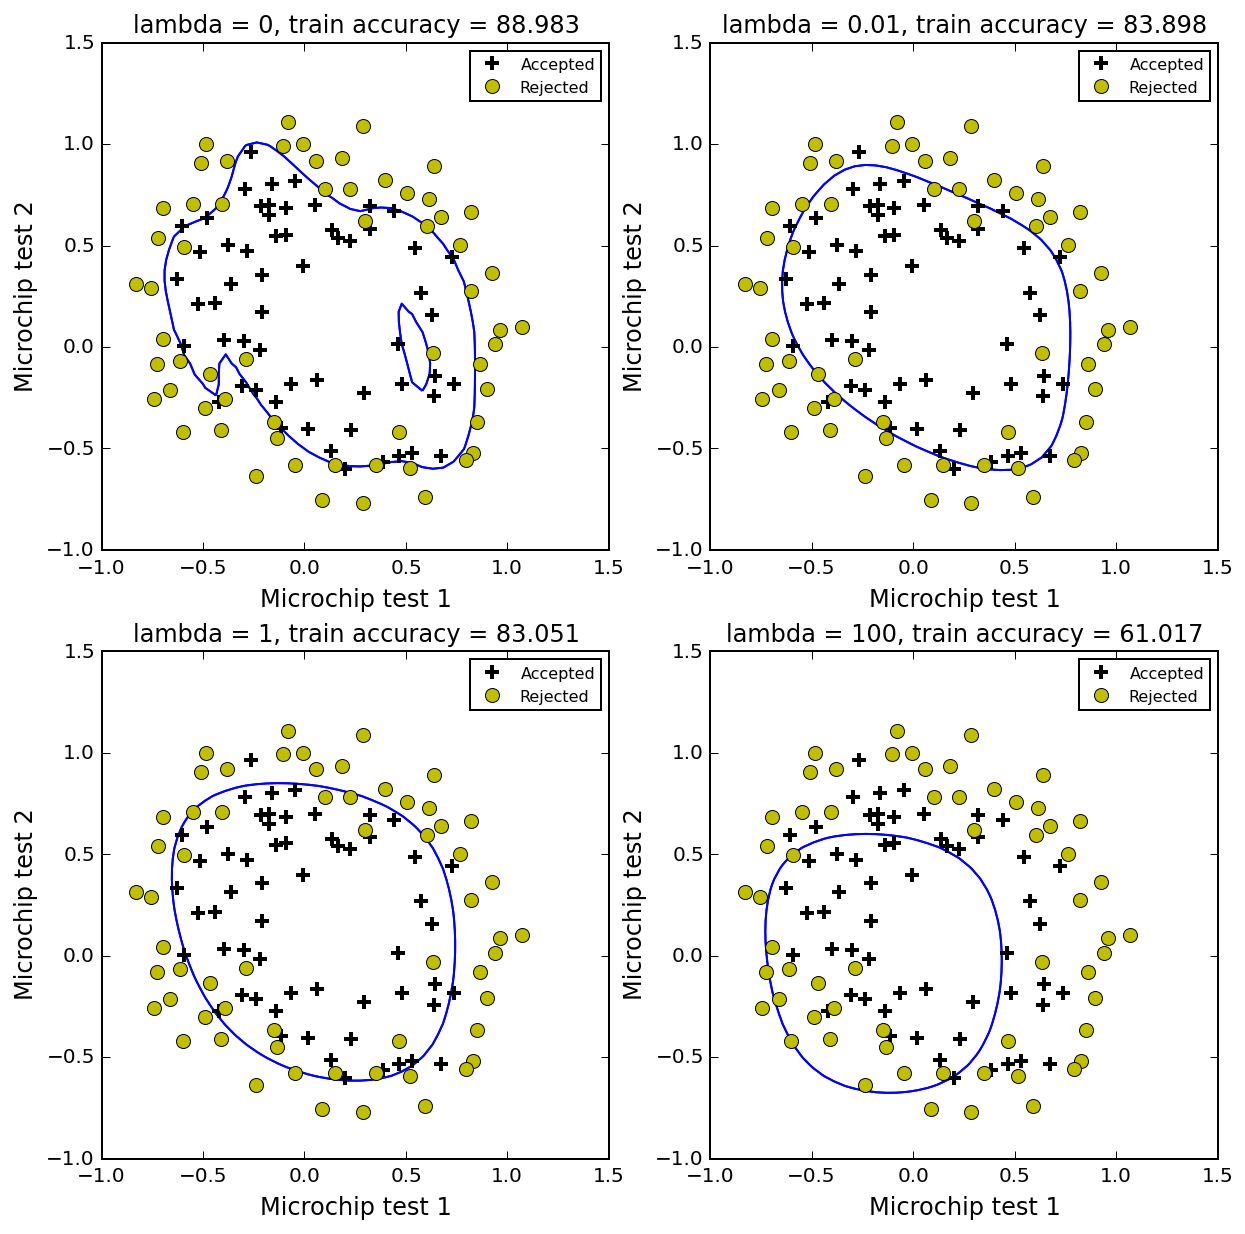

In [26]:
fig = plt.figure(figsize=(10,10))

lams = [0, 0.01, 1, 100]
for ct, lam in enumerate(lams):
    theta_new_reg = fmin_bfgs(compute_cost_reg, initial_theta, fprime=compute_grad_reg,
                          maxiter=500, args=(X, y, lam), disp=False)
    
    p = predict(theta_new_reg, X)
    plt.subplot(2,2,ct+1)
    
    plotDecisionBoundary2(theta_new_reg, X, y)
    plt.title('lambda = %g, train accuracy = %3.3f' %(lam, np.mean(p==y)*100))
    

In [27]:
print X.shape, y.shape

(118, 28) (118,)
